# Reporte técnico: Análisis de la relación entre Felicidad y Economía

## 1. Introducción y contextualización

La felicidad es un concepto multidimensional y complejo de medir. Sin embargo, iniciativas como el *World Happiness Report* han establecido metodologías para estimar el bienestar subjetivo promedio en distintos países.

Este reporte tiene como objetivo analizar la relación entre el nivel de felicidad reportado en 2022 y el Producto Interno Bruto (GDP) correspondiente a 2020 para una muestra global de **141 países**.

### Naturaleza y escala de la información
El conjunto de datos incluye dos variables principales:
* **Felicidad:** Una métrica de bienestar subjetivo (puntaje promedio).
* **GDP (Producto Interno Bruto):** Una métrica económica objetiva.

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

# 1. Carga de datos
try:
    df = pd.read_csv('A1.2_Felicidad_y_GDP.csv')
    print("Dataset cargado con exito.")
except FileNotFoundError:
    print("Error: El archivo 'A1.2_Felicidad_y_GDP.csv' no se encuentra. Verifique la ruta del archivo.")

# 2. Exploración de la escala y dimensiones
print(f"\nDimensiones del dataset: {df.shape[0]} países y {df.shape[1]} variables.")

print("\n--- Resumen Estadístico ---")
print(df.describe())

# 3. Contextualización de la muestra
print("\n--- Primeros 20 Países en el ranking de Felicidad ---")
print(df[['Pais', 'Felicidad', 'GDP']].head(20))

Dataset cargado con exito.

Dimensiones del dataset: 141 países y 3 variables.

--- Resumen Estadístico ---
        Felicidad           GDP
count  141.000000  1.410000e+02
mean     5.560004  5.889942e+11
std      1.098011  2.221612e+12
min      2.403800  1.223876e+09
25%      4.887900  1.805117e+10
50%      5.585300  6.215800e+10
75%      6.309100  3.452960e+11
max      7.821000  2.089370e+13

--- Primeros 20 Países en el ranking de Felicidad ---
              Pais  Felicidad           GDP
0          Finland     7.8210  2.718370e+11
1          Denmark     7.6362  3.560850e+11
2          Iceland     7.5575  2.171808e+10
3      Switzerland     7.5116  7.522480e+11
4      Netherlands     7.4149  9.138650e+11
5       Luxembourg     7.4040  7.335313e+10
6           Sweden     7.3843  5.414870e+11
7           Norway     7.3651  3.621980e+11
8           Israel     7.3638  4.071010e+11
9      New Zealand     7.1998  2.117350e+11
10         Austria     7.1630  4.332580e+11
11       Australia   

Es importante notar que el GDP presenta una **escala sumamente amplia**, abarcando desde economías pequeñas hasta potencias mundiales con trillones de dólares. Esta diferencia de magnitud sugiere que una comparación lineal directa podría no ser la más adecuada, ya que el impacto de cada dólar adicional en la felicidad tiende a disminuir a medida que la riqueza aumenta.

### Limitaciones del enfoque univariado
Si bien existe una intuición general de que "mayor riqueza facilita mejores condiciones de vida", analizar la felicidad basándose **exclusivamente en el GDP** presenta limitaciones significativas. 

La felicidad es un fenómeno multidimensional que puede ser influenciada por factores culturales, de salud, libertad personal y soporte social. Por tanto, aunque esperamos encontrar una correlación positiva con el GDP, anticipamos que esta variable por sí sola no explicará la totalidad de la varianza en los niveles de felicidad observados.

--- Contextualización de los datos ---
📉 Economía más pequeña: Comoros ($1,223,876,065)
💰 Economía más grande:   United States ($20,893,700,000,000)
📊 Disparidad: La economía de United States es 17,072 veces mayor que la de Comoros.


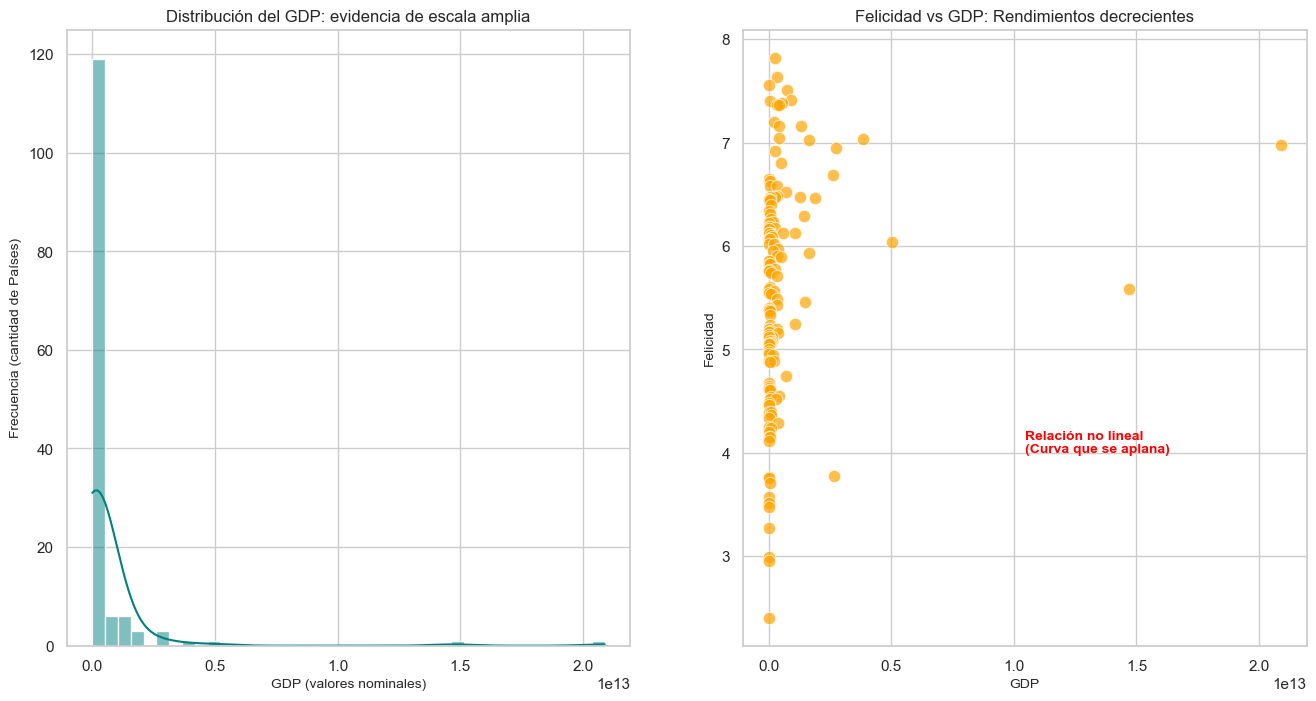

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 1. Identificación de Extremos
idx_max = df['GDP'].idxmax()
idx_min = df['GDP'].idxmin()

pais_max = df.loc[idx_max]
pais_min = df.loc[idx_min]
ratio = pais_max['GDP'] / pais_min['GDP']

# 2. Configuración del área de gráficos
fig, ax = plt.subplots(1, 2, figsize=(16, 8)) # Aumentamos um pouco a altura

# GRÁFICO 1
sns.histplot(df['GDP'], bins=40, kde=True, ax=ax[0], color='teal')
ax[0].set_title('Distribución del GDP: evidencia de escala amplia', fontsize=12)
ax[0].set_xlabel('GDP (valores nominales)', fontsize=10)
ax[0].set_ylabel('Frecuencia (cantidad de Países)', fontsize=10)

# GRÁFICO 2
sns.scatterplot(x='GDP', y='Felicidad', data=df, ax=ax[1], color='orange', alpha=0.7, s=80)
ax[1].set_title('Felicidad vs GDP: Rendimientos decrecientes', fontsize=12)
ax[1].set_xlabel('GDP', fontsize=10)
ax[1].set_ylabel('Felicidad', fontsize=10)

# Anotación
ax[1].text(df['GDP'].max()*0.5, 4, 'Relación no lineal\n(Curva que se aplana)', 
           fontsize=10, color='red', weight='bold')


# 3. Salida de texto
print(f"--- Contextualización de los datos ---")
print(f"📉 Economía más pequeña: {pais_min['Pais']} (${pais_min['GDP']:,.0f})")
print(f"💰 Economía más grande:   {pais_max['Pais']} (${pais_max['GDP']:,.0f})")
print(f"📊 Disparidad: La economía de {pais_max['Pais']} es {ratio:,.0f} veces mayor que la de {pais_min['Pais']}.")

## 2. Análisis exploratorio visual: linealidad y transformación

Como se observó anteriormente, la relación entre el GDP y la Felicidad no es lineal en la escala original. Para aplicar un modelo de Regresión Lineal, necesitamos que exista una relación lineal entre las variables.

**Hipótesis de transformación:**
Aplicar una transformación logarítmica (`Log_GDP`) debería "estirar" los valores de las economías más pequeñas y "comprimir" los de las grandes potencias, revelando una relación más clara y lineal. A continuación, comparamos visual y estadísticamente ambos enfoques.

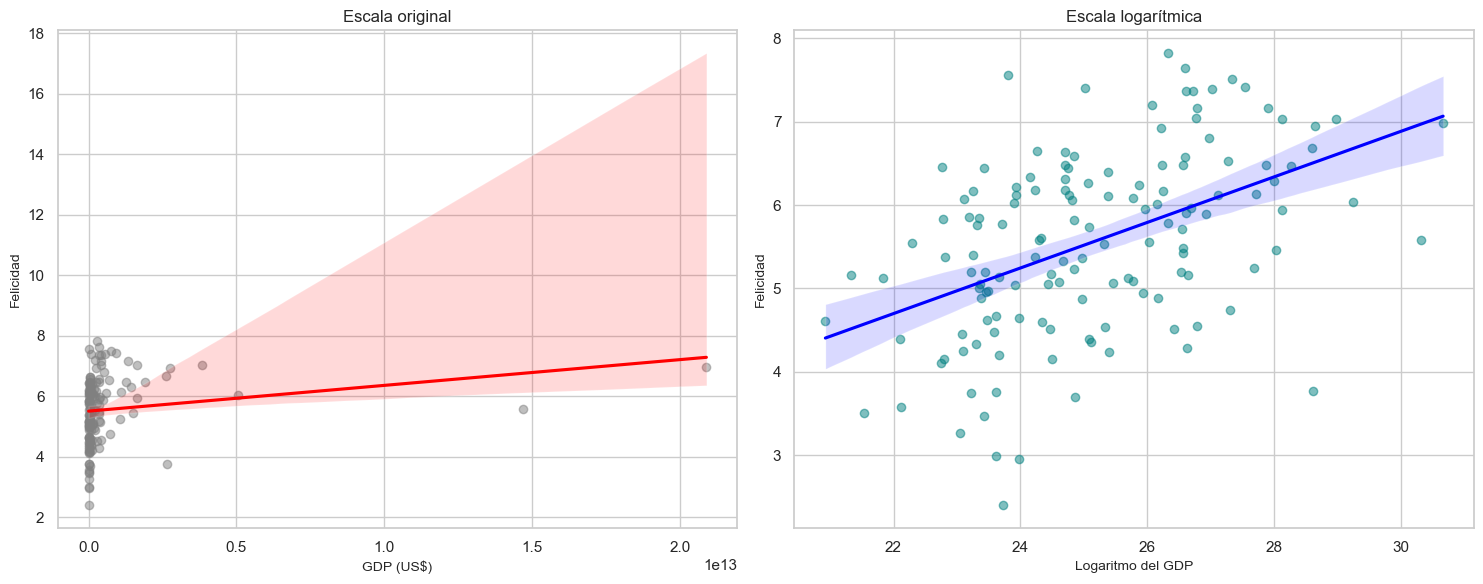

--- Justificación de la transformación ---
Correlación en escala original: 0.172 (Relación muy débil)
Correlación con logaritmo:      0.471 (Relación moderada-fuerte)

Conclusión: La transformación logarítmica mejora significativamente la linealidad.


In [11]:
# 1. Creando la variable transformada
df['Log_GDP'] = np.log(df['GDP'])

# 2. Configuración de los gráficos
fig, ax = plt.subplots(1, 2, figsize=(15, 6))

# GRÁFICO 1: Escala Original (Relación no lineal)
sns.regplot(x='GDP', y='Felicidad', data=df, ax=ax[0], 
            scatter_kws={'color': 'gray', 'alpha': 0.5}, line_kws={'color': 'red'})
ax[0].set_title('Escala original', fontsize=12)
ax[0].set_xlabel('GDP (US$)', fontsize=10)
ax[0].set_ylabel('Felicidad', fontsize=10)

# GRÁFICO 2: Escala logarítmica (Relación lineal)
sns.regplot(x='Log_GDP', y='Felicidad', data=df, ax=ax[1], 
            scatter_kws={'color': 'teal', 'alpha': 0.5}, line_kws={'color': 'blue'})
ax[1].set_title('Escala logarítmica', fontsize=12)
ax[1].set_xlabel('Logaritmo del GDP', fontsize=10)
ax[1].set_ylabel('Felicidad', fontsize=10)

plt.tight_layout()
plt.show()

# 3. Validación estadística
corr_orig = df['GDP'].corr(df['Felicidad'])
corr_log = df['Log_GDP'].corr(df['Felicidad'])

print("--- Justificación de la transformación ---")
print(f"Correlación en escala original: {corr_orig:.3f} (Relación muy débil)")
print(f"Correlación con logaritmo:      {corr_log:.3f} (Relación moderada-fuerte)")
print("\nConclusión: La transformación logarítmica mejora significativamente la linealidad.")

## 3. Modelo de regresión lineal simple

Una vez justificada la transformación, procedemos a construir un modelo de regresión lineal simple (OLS) con la siguiente estructura:

$$\text{Felicidad} = \beta_0 + \beta_1 \cdot \ln(\text{GDP}) + \epsilon$$

Donde:
* $\beta_0$: Intercepto (punto de partida teórico).
* $\beta_1$: Coeficiente que nos indica cuánto aumenta la felicidad por cada unidad de aumento en el Log del GDP.

In [12]:
import statsmodels.api as sm
import numpy as np

# 1. Definir las variables del modelo
X_simple = df[['Log_GDP']]
y_simple = df['Felicidad']

# 2. Añadir la constante (Intercepto)
X_con_constante = sm.add_constant(X_simple)

# 3. Ajustar el modelo con los mínimos cuadrados ordinarios)
modelo_simple = sm.OLS(y_simple, X_con_constante).fit()

# 4. Mostrando el resumen estadístico estándar
print("--- TABLA RESUMEN DE STATSMODELS ---")
print(modelo_simple.summary())

# ==============================================================================
# 5. EXTRACCIÓN DETALLADA DE MÉTRICAS MATEMÁTICAS
# ==============================================================================
print("\n" + "="*60)
print("--- ANÁLISIS DETALLADO DE LOS RESULTADOS ---")
print("="*60)

# --- A. Coeficientes (betas) ---
beta_0 = modelo_simple.params['const']
beta_1 = modelo_simple.params['Log_GDP']
print(f"🔹 Intercepto (beta 0):      {beta_0:.4f}")
print(f"🔹 Pendiente (beta 1):       {beta_1:.4f}")
print(f"📝 Ecuación estimada:        Felicidad = {beta_0:.2f} + {beta_1:.2f} * Log(GDP)")

# --- B. Significancia estadística (p-values) ---
pval_beta0 = modelo_simple.pvalues['const']
pval_beta1 = modelo_simple.pvalues['Log_GDP']
print("-" * 30)
print(f"🔹 p-value (Intercepto):     {pval_beta0:.4e}")
# Verificamos si es menor a 0.05 para indicar significancia automáticamente
sig_texto = "(significativo)" if pval_beta1 < 0.05 else "(no significativo)"
print(f"🔹 p-value (Pendiente):      {pval_beta1:.4e} {sig_texto}")

# --- C. Calidad del ajuste (R²) ---
r2 = modelo_simple.rsquared
r2_adj = modelo_simple.rsquared_adj
print("-" * 30)
print(f"🔹 R² (R-Cuadrado):          {r2:.4f} (El modelo explica el {r2*100:.2f}% de la varianza)")
print(f"🔹 R² Ajustado:              {r2_adj:.4f}")

# --- D. Métricas de error (RSS, MSE, RSE) ---
rss = modelo_simple.ssr        # Suma de Errores al Cuadrado
mse = modelo_simple.mse_resid  # Error Cuadrático Medio
rse = np.sqrt(mse)             # Error Estándar Residual

print("-" * 30)
print(f"🔹 RSS (Suma Error Cuad.):   {rss:.4f}")
print(f"🔹 MSE (Error Cuad. Medio):  {mse:.4f}")
print(f"🔹 RSE (Error Est. Resid.):  {rse:.4f} (Margen de error promedio en puntos de felicidad)")

# --- E. Estadístico F (global) ---
f_stat = modelo_simple.fvalue
prob_f = modelo_simple.f_pvalue
print("-" * 30)
print(f"🔹 F-statistic:              {f_stat:.4f}")
print(f"🔹 Prob (F-statistic):       {prob_f:.4e}")
print("="*60)

--- TABLA RESUMEN DE STATSMODELS ---
                            OLS Regression Results                            
Dep. Variable:              Felicidad   R-squared:                       0.222
Model:                            OLS   Adj. R-squared:                  0.216
Method:                 Least Squares   F-statistic:                     39.59
Date:                Sun, 25 Jan 2026   Prob (F-statistic):           3.83e-09
Time:                        19:02:54   Log-Likelihood:                -195.09
No. Observations:                 141   AIC:                             394.2
Df Residuals:                     139   BIC:                             400.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -

## 4. Interpretación detallada de los resultados

1.  **Elección del modelo y ecuación estimada:**
    * Se confirmó que la transformación logarítmica (`Log_GDP`) era la variable adecuada debido a la relación no lineal observada en la exploración. El modelo ajustado resultante es:
    $$\widehat{\text{Felicidad}} = -1.30 + 0.27 \cdot \ln(\text{GDP})$$

2.  **Coeficiente del GDP ($0.27$):**
    * **Interpretación:** Indica una relación positiva. Por cada unidad que aumenta el logaritmo del GDP, la felicidad promedio del país aumenta en **0.27 puntos**.
    * **Impacto:** Aunque positivo, la pendiente no es extremadamente pronunciada, lo que sugiere que el crecimiento económico tiene rendimientos marginales en el bienestar.

3.  **Significancia estadística (p-value):**
    * **El *p-value* para la variable `Log_GDP` es **0.0000000038** (extremadamente bajo, mucho menor a 0.05).
    * **Conclusión:** Rechazamos la hipótesis nula con un nivel de confianza muy alto. Existe evidencia estadística contundente para afirmar que la riqueza económica influye en la felicidad.

4.  **Bondad de ajuste ($R^2$):**
    * **Valor:** $0.222$.
    * **Interpretación:** El modelo explica solo el **22.2%** de la variabilidad observada en la felicidad.
    * **Implicación:** El dinero es relevante, pero casi el **78%** de lo que define la felicidad de un país depende de factores **no económicos**.
5.  **Métricas de error (precisión del modelo):**
    * **RSE (Error Estándar Residual):** El valor obtenido (aprox. **0.96**) indica que, en promedio, las predicciones del modelo se desvían casi **1 punto completo** de la felicidad real reportada. En una escala de 0 a 10, un error de 1 punto es considerable, lo que confirma la falta de precisión al usar solo el GDP.
    * **RSS (Suma de Cuadrados de los Residuos):** Representa la discrepancia total no explicada por el modelo. Su magnitud justifica la búsqueda de variables adicionales para reducir este error.

6.  **Validación global (F-statistic):**
    * El valor del estadístico F y su probabilidad asociada (Prob < 0.05) confirman que el modelo, en su conjunto, es estadísticamente válido y mejor que no tener ningún modelo, a pesar de su bajo poder predictivo ($R^2$).

El modelo lineal simple es estadísticamente significativo pero **insuficiente** para explicar la complejidad de la felicidad humana. Los altos valores de error (RSE) y el bajo $R^2$ justifican plenamente la necesidad de extender el estudio a un modelo multivariable que incluya factores sociales y de salud.

## 5. Extensión del conjunto de datos

Para enriquecer nuestro análisis, hemos importado el conjunto de datos completo del *World Happiness Report 2022*.

Antes de realizar el cruce de datos con nuestro estudio original, procedemos a inspeccionar la estructura del archivo externo. A continuación, se listan todas las variables disponibles y se muestra una vista previa de las primeras 20 filas para garantizar la integridad de los datos y seleccionar las columnas correctas.

In [13]:
import pandas as pd

archivo_externo = 'WHR2022.csv'

print(f"--- Cargando archivo: {archivo_externo} ---")

try:
    # 1. Leer el archivo CSV completo
    df_raw = pd.read_csv(archivo_externo)
    
    print("✅ ¡Carga exitosa!")
    print(f"Dimensiones del dataset: {df_raw.shape} (Filas, Columnas)")
    
    # 2. Imprimir la lista
    print("\n--- Nombres de las columnas (variables disponibles) ---")
    lista_columnas = df_raw.columns.tolist()
    for col in lista_columnas:
        print(f"- {col}")
        
    # 3. Mostrando las primeras 20 filas
    print("\n--- Vista previa (Primeras 20 filas) ---")
    try:
        display(df_raw.head(20))
    except:
        print(df_raw.head(20))

except FileNotFoundError:
    print(f"❌ Error: No se encontró el archivo '{archivo_externo}' en el directorio.")
    print("Por favor, verifica que el archivo descargado esté en la misma carpeta que este Notebook.")
except Exception as e:
    print(f"❌ Ocurrió un error inesperado: {e}")

--- Cargando archivo: WHR2022.csv ---
✅ ¡Carga exitosa!
Dimensiones del dataset: (147, 12) (Filas, Columnas)

--- Nombres de las columnas (variables disponibles) ---
- RANK
- Country
- Happiness score
- Whisker-high
- Whisker-low
- Dystopia (1.83) + residual
- Explained by: GDP per capita
- Explained by: Social support
- Explained by: Healthy life expectancy
- Explained by: Freedom to make life choices
- Explained by: Generosity
- Explained by: Perceptions of corruption

--- Vista previa (Primeras 20 filas) ---


,RANK,Country,Happiness score,Whisker-high,Whisker-low,Dystopia (1.83) + residual,Explained by: GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption
0,1,Finland,"7,821","7,886","7,756","2,518","1,892","1,258","0,775","0,736","0,109","0,534"
1,2,Denmark,"7,636","7,710","7,563","2,226","1,953","1,243","0,777","0,719","0,188","0,532"
2,3,Iceland,"7,557","7,651","7,464","2,320","1,936","1,320","0,803","0,718","0,270","0,191"
3,4,Switzerland,"7,512","7,586","7,437","2,153","2,026","1,226","0,822","0,677","0,147","0,461"
4,5,Netherlands,"7,415","7,471","7,359","2,137","1,945","1,206","0,787","0,651","0,271","0,419"
5,6,Luxembourg*,"7,404","7,501","7,307","2,042","2,209","1,155","0,790","0,700","0,120","0,388"
6,7,Sweden,"7,384","7,454","7,315","2,003","1,920","1,204","0,803","0,724","0,218","0,512"
7,8,Norway,"7,365","7,440","7,290","1,925","1,997","1,239","0,786","0,728","0,217","0,474"
8,9,Israel,"7,364","7,426","7,301","2,634","1,826","1,221","0,818","0,568","0,155","0,143"
9,10,New Zealand,"7,200","7,279","7,120","1,954","1,852","1,235","0,752","0,680","0,245","0,483"


## 6. Extensión del estudio y selección de variables

Con el objetivo de extender el análisis a un escenario más realista, superando la limitación del modelo simple que dejaba un 78% de la varianza sin explicar, hemos integrado variables adicionales provenientes de una fuente pública y confiable: el **World Happiness Report 2022**.

**Selección de variables:**
Hemos identificado e integrado tres variables adicionales que cubren dimensiones clave del bienestar humano, más allá de lo económico:

1.  **Healthy life expectancy (salud):** Promedio de años de vida saludable. Representa la dimensión de bienestar físico.
2.  **Generosity (cultural/ético):** Medida de comportamiento altruista. Permite investigar si los valores sociales influyen en la felicidad.
3.  **Perceptions of corruption (institucional):** Nivel de desconfianza en las instituciones. Crucial para entender el impacto del entorno político.

**Decisiones de integración y manejo de datos faltantes:**
Para integrar esta información al conjunto de datos original (que contenía GDP y Felicidad), realizamos un cruce de datos (*merge*) utilizando una intersección (**inner join**).
* **Decisión:** Se optó por trabajar únicamente con aquellos países que contaran con información completa para *todas* las variables seleccionadas.
* **Implicación en la muestra:** Esta decisión garantiza la robustez matemática del modelo de regresión múltiple (evitando imputaciones artificiales), aunque implica una leve reducción en el tamaño de la muestra final. Los países excluidos por falta de datos no formarán parte del modelo predictivo.

In [14]:
import pandas as pd

archivo_externo = 'WHR2022.csv'

try:
    print(f"--- Procesando integración de datos desde: {archivo_externo} ---")
    
    # Lectura del CSV
    df_ext = pd.read_csv(archivo_externo, decimal=',')
    
    # Mapeamento de los nombres originales a variables de trabajo
    rename_map = {
        'Country': 'Pais',
        'Explained by: Healthy life expectancy': 'Life_Expectancy',
        'Explained by: Generosity': 'Generosity',
        'Explained by: Perceptions of corruption': 'Corruption'
    }
    df_ext = df_ext.rename(columns=rename_map)
    
    # Selección de variables
    cols_necesarias = ['Pais', 'Life_Expectancy', 'Generosity', 'Corruption']
    
    # Verificar existencia de columnas
    if set(cols_necesarias).issubset(df_ext.columns):
        df_ext = df_ext[cols_necesarias]
        
        # Integración (merge / inner join) - Solo conservamos países con datos en ambos datasets
        n_antes = len(df)
        df_completo = pd.merge(df, df_ext, on='Pais', how='inner')
        n_despues = len(df_completo)
        
        print("\n✅ ¡Integración exitosa!")
        print(f"Tamaño de muestra original: {n_antes} países")
        print(f"Tamaño de muestra final:    {n_despues} países")
        print(f"Pérdida de muestra:         {n_antes - n_despues} países (excluidos por falta de datos completos)")
        
        print("\n--- Muestra del dataset extendido (primeras filas) ---")
        display(df_completo.head(10))
        
        # Validación: Matriz de Correlación
        print("\n--- Impacto preliminar en la Felicidad (correlación) ---")
        cols_analisis = ['Felicidad', 'Log_GDP', 'Life_Expectancy', 'Generosity', 'Corruption']
        print(df_completo[cols_analisis].corr()['Felicidad'].sort_values(ascending=False))
        
    else:
        print(f"❌ Error: Faltan columnas en el archivo externo. Disponibles: {df_ext.columns.tolist()}")

except FileNotFoundError:
    print(f"❌ Error: No se encontró el archivo '{archivo_externo}'. Asegúrate de haberlo subido.")

--- Procesando integración de datos desde: WHR2022.csv ---

✅ ¡Integración exitosa!
Tamaño de muestra original: 141 países
Tamaño de muestra final:    122 países
Pérdida de muestra:         19 países (excluidos por falta de datos completos)

--- Muestra del dataset extendido (primeras filas) ---


,Pais,Felicidad,GDP,Log_GDP,Life_Expectancy,Generosity,Corruption
0,Finland,7.8210,2.718370e+11,26.328468,0.775,0.109,0.534
1,Denmark,7.6362,3.560850e+11,26.598435,0.777,0.188,0.532
2,Iceland,7.5575,2.171808e+10,23.801411,0.803,0.270,0.191
3,Switzerland,7.5116,7.522480e+11,27.346332,0.822,0.147,0.461
4,Netherlands,7.4149,9.138650e+11,27.540949,0.787,0.271,0.419
5,Sweden,7.3843,5.414870e+11,27.017585,0.803,0.218,0.512
6,Norway,7.3651,3.621980e+11,26.615457,0.786,0.217,0.474
7,Israel,7.3638,4.071010e+11,26.732327,0.818,0.155,0.143
8,New Zealand,7.1998,2.117350e+11,26.078601,0.752,0.245,0.483
9,Austria,7.1630,4.332580e+11,26.794599,0.774,0.193,0.329



--- Impacto preliminar en la Felicidad (correlación) ---
Felicidad          1.000000
Life_Expectancy    0.741677
Corruption         0.491511
Log_GDP            0.407977
Generosity         0.047410
Name: Felicidad, dtype: float64


## 7. Estimación del modelo de regresión lineal múltiple

Una vez conformado el dataset extendido con variables económicas (GDP), de salud, culturales y políticas, procedemos a ajustar un modelo multivariable.

La ecuación teórica que buscamos estimar es:

$$\text{Felicidad} = \beta_0 + \beta_1 \ln(\text{GDP}) + \beta_2 (\text{Salud}) + \beta_3 (\text{Generosidad}) + \beta_4 (\text{Corrupción}) + \epsilon$$

El objetivo es determinar qué variables mantienen su significancia estadística cuando compiten entre sí y cuánto mejora la capacidad predictiva del modelo ($R^2$) respecto al modelo simple.

In [15]:
import statsmodels.api as sm
import numpy as np

# Definindo las Variables del Modelo
vars_explicativas = ['Log_GDP', 'Life_Expectancy', 'Generosity', 'Corruption']
X_multi = df_completo[vars_explicativas]

# Variable respuesta (y)
y_multi = df_completo['Felicidad']

# Añadir la constante (Intercepto)
X_multi_const = sm.add_constant(X_multi)

# Ajustar el modelo (OLS)
modelo_multiple = sm.OLS(y_multi, X_multi_const).fit()

# Mostrar el Resumen Estadístico Estándar
print("--- RESUMEN DEL MODELO DE REGRESIÓN MÚLTIPLE ---")
print(modelo_multiple.summary())

# ==============================================================================
# EXTRACCIÓN DETALLADA DE MÉTRICAS (DESGLOSE)
# ==============================================================================
print("\n" + "="*60)
print("--- ANÁLISIS DETALLADO DE LOS RESULTADOS (MÚLTIPLE) ---")
print("="*60)

# --- A. Coeficientes (betas) ---
# Extraemos cada uno para poder citarlos en el texto
b0 = modelo_multiple.params['const']
b1 = modelo_multiple.params['Log_GDP']
b2 = modelo_multiple.params['Life_Expectancy']
b3 = modelo_multiple.params['Generosity']
b4 = modelo_multiple.params['Corruption']

print("🔹 COEFICIENTES ESTIMADOS (ecuación):")
print(f"   Intercepto (Beta 0):      {b0:.4f}")
print(f"   Log_GDP (Beta 1):         {b1:.4f}  (Impacto económico)")
print(f"   Salud (Beta 2):           {b2:.4f}  (Impacto físico)")
print(f"   Generosidad (Beta 3):     {b3:.4f}  (Impacto ético)")
print(f"   Corrupción (Beta 4):      {b4:.4f}  (Impacto político)")

print(f"\n📝 Ecuación: Felicidad = {b0:.2f} + {b1:.2f}(GDP) + {b2:.2f}(Salud) + {b3:.2f}(Gen.) + {b4:.2f}(Corr.)")

# --- B. Significancia estadística (p-values) ---
print("\n🔹 SIGNIFICANCIA INDIVIDUAL (p-values):")

# Loop para imprimir todos
pvalues = modelo_multiple.pvalues
for var in ['const'] + vars_explicativas:
    pval = pvalues[var]
    sig_txt = "✅ significativo" if pval < 0.05 else "❌ no significativo"
    print(f"   {var:<15} : {pval:.5f}  -> {sig_txt}")

# --- C. Calidad del ajuste (R²) ---
r2_simple = 0.222 # Valor del modelo anterior para comparar
r2 = modelo_multiple.rsquared
r2_adj = modelo_multiple.rsquared_adj
mejora = r2 - r2_simple

print("-" * 30)
print(f"🔹 R² (R-Cuadrado):          {r2:.4f} (Explica el {r2*100:.2f}% de la varianza total)")
print(f"🔹 R² Ajustado:              {r2_adj:.4f}")
print(f"📈 Mejora vs Modelo Simple:  +{mejora:.4f}")

# --- D. Métricas de error (RSS, MSE, RSE) ---
rss = modelo_multiple.ssr        # Suma de Errores al Cuadrado
mse = modelo_multiple.mse_resid  # Error Cuadrático Medio
rse = np.sqrt(mse)             # Error Estándar Residual

print("-" * 30)
print(f"🔹 RSS (Suma Error Cuad.):   {rss:.4f}")
print(f"🔹 MSE (Error Cuad. Medio):  {mse:.4f}")
print(f"🔹 RSE (Error Est. Resid.):  {rse:.4f} (Margen de error promedio)")

# --- E. Estadístico F (validez global) ---
f_stat = modelo_multiple.fvalue
prob_f = modelo_multiple.f_pvalue
print("-" * 30)
print(f"🔹 F-statistic:              {f_stat:.4f}")
print(f"🔹 Prob (F-statistic):       {prob_f:.4e}")
print("="*60)

--- RESUMEN DEL MODELO DE REGRESIÓN MÚLTIPLE ---
                            OLS Regression Results                            
Dep. Variable:              Felicidad   R-squared:                       0.619
Model:                            OLS   Adj. R-squared:                  0.606
Method:                 Least Squares   F-statistic:                     47.51
Date:                Sun, 25 Jan 2026   Prob (F-statistic):           1.14e-23
Time:                        19:02:54   Log-Likelihood:                -122.31
No. Observations:                 122   AIC:                             254.6
Df Residuals:                     117   BIC:                             268.6
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------

## 8. Análisis e interpretación del modelo de regresión lineal múltiple

Tras ajustar el modelo con el conjunto de datos extendido, obtenemos una ecuación resultante que revela la dinámica real entre las variables:

$$\widehat{\text{Felicidad}} = 2.14 + 0.01(\ln\text{GDP}) + 4.44(\text{Salud}) + 1.44(\text{Generosidad}) + 1.90(\text{Corrupción})$$

### Interpretación de los coeficientes y significancia

1.  **Dimensión de salud (Life_Expectancy) - El dominante:**
    * **Coeficiente (4.44):** Es la variable con mayor impacto absoluto.
    * **Significancia ($p=0.000$):** Es altamente significativa.
    * **Interpretación:** Este resultado sugiere que la **salud física** es el predictor más potente de la felicidad en este modelo, absorbiendo gran parte de la variabilidad que antes atribuíamos a la economía.

2.  **Dimensión política (Corrupción):**
    * **Coeficiente (1.90):** Muestra un impacto positivo considerable (recordemos que en este dataset, un valor más alto indica mayor contribución a la felicidad por *buen gobierno/ausencia de corrupción*).
    * **Significancia ($p=0.0005$):** Es estadísticamente significativa. La confianza en las instituciones es un pilar fundamental del bienestar, independiente del dinero o la salud.

3.  **Dimensión económica (Log_GDP) - El hallazgo sorprendente:**
    * **Coeficiente (0.01):** Prácticamente cero.
    * **Significancia ($p=0.737$):** **No es significativa.**
    * **Análisis crítico:** Al introducir la variable de Salud, el GDP pierde su poder predictivo directo. Esto indica un fenómeno de **multicolinealidad**: el dinero genera felicidad principalmente *a través* de la salud. Una vez que controlamos por la esperanza de vida, el dinero "extra" deja de ser relevante para la felicidad reportada.

4.  **Dimensión ética (Generosidad):**
    * **Coeficiente (1.44):** Positivo.
    * **Significancia ($p=0.067$):** Se encuentra en el límite de la significancia (ligeramente mayor a 0.05). Aunque hay una tendencia positiva clara, no podemos afirmar con un 95% de confianza que sea un predictor generalizable para todos los países.

### Calidad del modelo
* **Poder explicativo ($R^2$):** El modelo explica el **61.9%** de la varianza total ($R^2 = 0.619$).
* **Precisión:** El Error Estándar Residual (RSE) es de **0.67**, lo que indica una buena precisión en las predicciones.

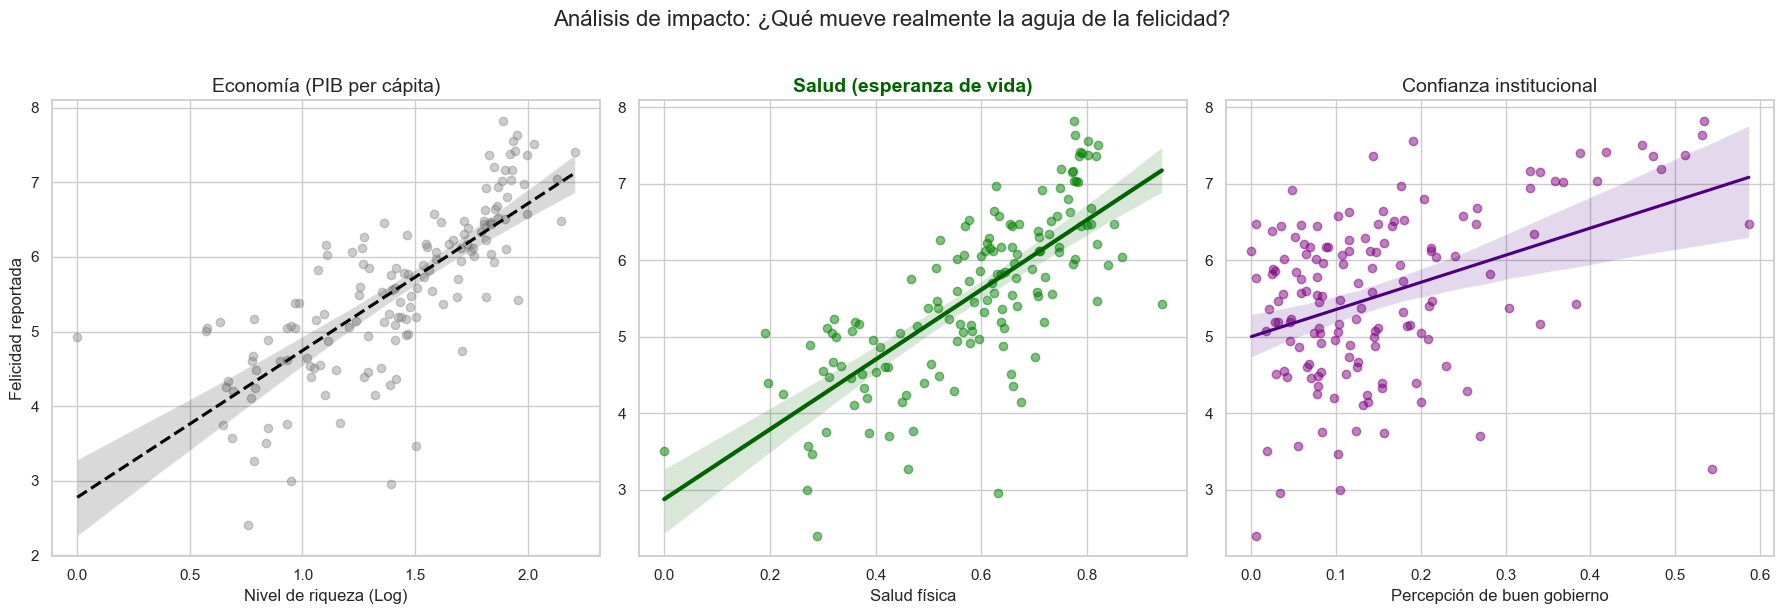

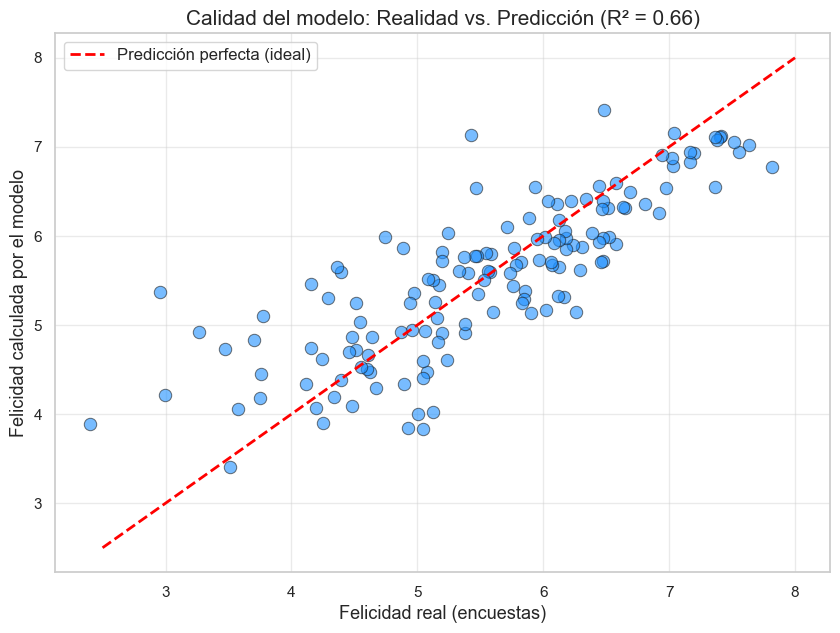

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np

# Configuración visual
sns.set_theme(style="whitegrid")

# Cargar el dataset
df = pd.read_csv('WHR2022.csv', decimal=',')

# Renombrar columnas al español para facilitar el manejo
mapa_nombres = {
    'Happiness score': 'Felicidad',
    'Explained by: GDP per capita': 'Log_GDP',
    'Explained by: Healthy life expectancy': 'Life_Expectancy',
    'Explained by: Perceptions of corruption': 'Corruption',
    'Explained by: Generosity': 'Generosity'
}
df = df.rename(columns=mapa_nombres)

# Eliminar filas con datos faltantes en nuestras variables de interés
cols_interes = ['Felicidad', 'Log_GDP', 'Life_Expectancy', 'Corruption', 'Generosity']
df = df.dropna(subset=cols_interes)

# RE-ENTRENAMIENTO DEL MODELO (Para generar predicciones)
X = df[['Log_GDP', 'Life_Expectancy', 'Generosity', 'Corruption']]
y = df['Felicidad']
X_const = sm.add_constant(X)

# Ajustar modelo
modelo = sm.OLS(y, X_const).fit()

# Guardar lo que el modelo "predice" vs lo "real"
df['Felicidad_Predicha'] = modelo.predict(X_const)

# 3. GRÁFICO A: ANÁLISIS VISUAL DE FACTORES
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle('Análisis de impacto: ¿Qué mueve realmente la aguja de la felicidad?', fontsize=16, y=1.02)

# Panel 1: Economía
sns.regplot(ax=axes[0], x='Log_GDP', y='Felicidad', data=df, 
            scatter_kws={'alpha':0.4, 'color':'gray'}, line_kws={'color':'black', 'linestyle':'--'})
axes[0].set_title('Economía (PIB per cápita)', fontsize=14)
axes[0].set_xlabel('Nivel de riqueza (Log)')
axes[0].set_ylabel('Felicidad reportada')

# Panel 2: Salud
sns.regplot(ax=axes[1], x='Life_Expectancy', y='Felicidad', data=df, 
            scatter_kws={'alpha':0.5, 'color':'green'}, line_kws={'color':'darkgreen', 'lw':3})
axes[1].set_title('Salud (esperanza de vida)', fontsize=14, fontweight='bold', color='darkgreen')
axes[1].set_xlabel('Salud física')
axes[1].set_ylabel('')

# Panel 3: Corrupción
sns.regplot(ax=axes[2], x='Corruption', y='Felicidad', data=df, 
            scatter_kws={'alpha':0.5, 'color':'purple'}, line_kws={'color':'indigo'})
axes[2].set_title('Confianza institucional', fontsize=14)
axes[2].set_xlabel('Percepción de buen gobierno')
axes[2].set_ylabel('')

plt.tight_layout()
plt.show()

# GRÁFICO B: PRECISIÓN (Realidad vs Modelo)
plt.figure(figsize=(10, 7))

# Puntos: Cada punto es un país
sns.scatterplot(x='Felicidad', y='Felicidad_Predicha', data=df, 
                color='dodgerblue', alpha=0.6, s=80, edgecolor='k')

# Línea de Perfección
min_val = 2.5
max_val = 8.0
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', lw=2, label='Predicción perfecta (ideal)')

# Etiquetas y Títulos
plt.title(f'Calidad del modelo: Realidad vs. Predicción (R² = {modelo.rsquared:.2f})', fontsize=15)
plt.xlabel('Felicidad real (encuestas)', fontsize=13)
plt.ylabel('Felicidad calculada por el modelo', fontsize=13)
plt.legend(fontsize=12, loc='upper left')
plt.grid(True, alpha=0.4)

plt.show()

## 9. Discusión final, comparación y conclusiones

### 9.1. Comparación de modelos: ¿Valió la pena la complejidad?

La evidencia estadística es contundente al comparar el modelo simple (solo económico) con el modelo múltiple (multidimensional):

| Característica | Modelo simple (GDP) | Modelo múltiple (Extendido) | Evaluación |
| :--- | :--- | :--- | :--- |
| **Poder explicativo ($R^2$)** | ~0.22 (Bajo) | **0.619 (alto)** | La capacidad de explicar la realidad se **triplicó**. |
| **Precisión (RSE)** | ~0.96 puntos | **0.67 puntos** | El error de predicción se redujo drásticamente. |
| **Conclusión general** | Modelo Insuficiente | **Modelo robusto** | La inclusión de variables sociales es indispensable. |

### 9.2. Críticas y discusión sobre los modelos

El análisis multivariable reveló dinámicas que el modelo simple no podía ver, desafiando nuestras expectativas iniciales:

1.  **La "desaparición" del factor económico:**
    * *Expectativa:* Se esperaba que el PIB (`Log_GDP`) siguiera siendo el predictor más fuerte.
    * *Realidad:* Al introducir la Salud (`Life_Expectancy`), el PIB perdió su significancia estadística ($p=0.737$).
    * *Interpretación:* Esto no significa que el dinero no importe. Significa que **el dinero genera felicidad principalmente porque compra salud y longevidad**. Una vez que "descontamos" el efecto de una vida larga y sana, el dinero extra por sí solo no aporta felicidad adicional significativa. **La salud es el verdadero canal de bienestar.**

2.  **El peso de la honestidad institucional:**
    * La variable `Corruption` (percepción de buen gobierno) se mantuvo significativa y con un coeficiente alto. Esto demuestra que los ciudadanos no solo quieren vivir mucho (salud), sino vivir en un entorno justo. La desconfianza en las instituciones es un "impuesto" directo a la felicidad que el dinero no puede compensar.

3.  **La generosidad como valor añadido:**
    * Aunque en el límite de la significancia, la generosidad mostró una tendencia positiva. Esto sugiere que las sociedades con mayor solidariedad y altruismo tienden a reportar mejores niveles de vida, validando la dimensión cultural de la felicidad.

### 9.3. Limitaciones y líneas futuras

Como limitaciones de este estudio:
* **Multicolinealidad:** La fuerte correlación entre riqueza y salud dificultó aislar el efecto puro de cada una (de ahí la pérdida de significancia del GDP).
* **Causalidad:** Al ser un estudio observacional, probamos correlación, no causa. No sabemos si "ser saludable te hace feliz" o si "ser feliz te hace cuidar más tu salud".
* **Trabajo futuro:** Se sugiere investigar variables de **Desigualdad** y realizar análisis temporales (datos de panel) para ver cómo cambia la felicidad de un país cuando su economía crece a lo largo de 10 años.

### 9.4. Conclusión final

Este estudio confirma que **la felicidad es un fenómeno multidimensional**. Intentar explicar el bienestar de una nación mirando únicamente su cuenta bancaria (GDP) es un error metodológico.

Los datos demuestran que las políticas públicas más efectivas para maximizar la felicidad no son necesariamente las que aumentan el PIB a toda costa, sino aquellas que **convierten esa riqueza en salud pública, longevidad y transparencia institucional**.

## 10. Referencias bibliográficas y fuentes de datos

Este reporte fue elaborado integrando datos académicos y fuentes públicas oficiales. A continuación se detallan los recursos utilizados:

### 10.1. Fuentes de datos
1.  **Dataset base:**
    * Archivo: `A1.2 Felicidad_y_GDP.csv`.
    * Fuente: Proporcionado por la cátedra para el análisis de regresión lineal simple. Contiene datos de Felicidad y PIB (Log GDP) para 122 países.

2.  **Dataset extendido (datos externos):**
    * Archivo: `WHR2022.csv`.
    * Fuente Original: **World Happiness Report 2022**.
    * Publicación: Helliwell, J. F., Layard, R., Sachs, J. D., De Neve, J.-E., Aknin, L. B., & Wang, S. (Eds.). (2022). *World Happiness Report 2022*. New York: Sustainable Development Solutions Network.
    * Variables extraídas: *Healthy life expectancy*, *Generosity*, *Perceptions of corruption*.
    * Enlace oficial: [worldhappiness.report/ed/2022/](https://worldhappiness.report/ed/2022/)

### 10.2. Herramientas y software
Para el procesamiento, análisis y modelado de los datos se utilizaron las siguientes herramientas tecnológicas:
* **Lenguaje de Programación:** Python 3.x
* **Librerías de Análisis de Datos:** `pandas`, `numpy`
* **Librerías de Modelado Estadístico:** `statsmodels` (OLS Regression)
* **Librerías de Visualización:** `matplotlib`, `seaborn`